# Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

# Data Preprocessing

In [ ]:
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')

In [ ]:
from sklearn.preprocessing import LabelEncoder
LE = LabelEncoder()
df['race'] = LE.fit_transform(df['race'])
df['period'] = LE.fit_transform(df['period'])

In [ ]:
df.drop('cx_site',
  axis='columns', inplace=True)

In [ ]:
df['length_of_stay_hours'].fillna(df['length_of_stay_hours'].median(), inplace=True)

In [ ]:
df['gestational_age_at_birth_weeks'].fillna(df['gestational_age_at_birth_weeks'].mean(), inplace=True)

In [ ]:
df['temp_celsius'].fillna(df['temp_celsius'].median(), inplace=True)

In [ ]:
df['birth_weight_kg'].fillna(df['birth_weight_kg'].mean(), inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
df = df.drop('overall_mortality_within_7_days', axis=1)
df = df.drop('overall_mortality_within_14_days', axis=1)
X = df.drop('overall_mortality_within_30_days', axis=1)
y = df.overall_mortality_within_30_days

In [ ]:
df.dtypes

episode_id                                  int64
unique_patient_id                           int64
sex                                         int64
race                                        int64
gestational_age_at_birth_weeks            float64
birth_weight_kg                           float64
sepsis_group                                int64
onset_age_in_days                           int64
onset_hour_of_day                           int64
blood_culture_positive                      int64
positive_days                               int64
time_to_antibiotics                         int64
stat_abx                                    int64
overall_mortality_within_30_days            int64
intubated_at_time_of_sepsis_evaluation      int64
intubated_free_days                         int64
inotrope_at_time_of_sepsis_eval             int64
inotrope_free_days                          int64
central_venous_line                         int64
umbilical_arterial_line                     int64


In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler().fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

In [ ]:
df.shape

(1946, 29)

In [ ]:
from statistics import mean, stdev 
from sklearn import preprocessing 
from sklearn.model_selection import StratifiedKFold 
from sklearn import linear_model 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from numpy.random import RandomState
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set_palette(['#06B1F0', '#FC4B60'])
random_seed = 63445
df = pd.read_csv(r'deid-nicu-sepsis-tta.csv')


import warnings
import numpy as np
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from collections import Counter
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from imblearn.over_sampling import ADASYN

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
X.shape

(1946, 28)

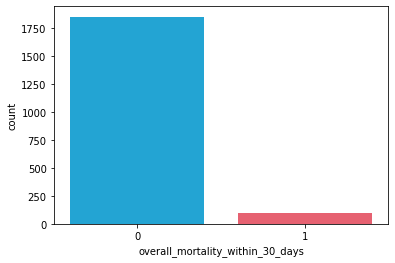

In [ ]:
sns.countplot(df['overall_mortality_within_30_days'])
plt.show()

# Handling Data Imbalance - SMOTENN

In [ ]:
def makeunderoverSample(X,Y):
    from imblearn.combine import SMOTEENN
    sm = SMOTEENN(random_state=0)
    X, Y = sm.fit_resample(X, Y)
    return(X,Y)

X , Y = makeunderoverSample(X,y)
print ('Shape of oversampled data: {}'.format(X.shape))
print ('Shape of Y: {}'.format(Y.shape))

Shape of oversampled data: (2963, 28)
Shape of Y: (2963,)


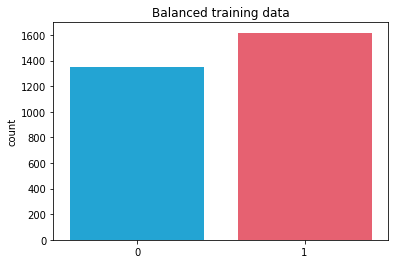

In [ ]:
sns.countplot(Y)
plt.title('Balanced training data')
plt.show()

In [ ]:
def count1(Y):
    countzero=0
    countone=0
    for i in range(0,len(Y)):
        if Y[i]==0:
            countzero=countzero+1
        elif Y[i]==1:
            countone=countone+1
    return countzero,countone

class0, class1 = count1(Y)

In [ ]:
print(class0,class1)

1346 1617


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
#X_val, X_test, Y_val, Y_test = train_test_split(X_val_and_test, Y_val_and_test, test_size=0.5)

In [ ]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(2074, 28) (889, 28) (2074,) (889,)


# He Normal Initialization with Leaky Relu and Sigmoid, including Dropout

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.initializers import he_normal
from keras.layers import Dropout
from keras.layers.advanced_activations import LeakyReLU, PReLU
initializer = he_normal()
leaky_relu = LeakyReLU(alpha=0.01)
model_7= Sequential([
    Dense(100, input_shape=(28,),kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(100, activation=leaky_relu,kernel_initializer=initializer),
    Dropout(0.2),
    Dense(1, activation='sigmoid',kernel_initializer=initializer),
])

In [ ]:
model_7.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
model_7.fit(X_train, Y_train,
          batch_size=32, epochs=70)

Epoch 1/70
65/65 [==============================] - 1s 3ms/step - loss: 0.8767 - accuracy: 0.5829
Epoch 2/70
65/65 [==============================] - 0s 3ms/step - loss: 0.5232 - accuracy: 0.7591
Epoch 3/70
65/65 [==============================] - 0s 3ms/step - loss: 0.3342 - accuracy: 0.8573
Epoch 4/70
65/65 [==============================] - 0s 3ms/step - loss: 0.2565 - accuracy: 0.8952
Epoch 5/70
65/65 [==============================] - 0s 3ms/step - loss: 0.2465 - accuracy: 0.8918
Epoch 6/70
65/65 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9200
Epoch 7/70
65/65 [==============================] - 0s 3ms/step - loss: 0.2147 - accuracy: 0.9017
Epoch 8/70
65/65 [==============================] - 0s 3ms/step - loss: 0.1885 - accuracy: 0.9308
Epoch 9/70
65/65 [==============================] - 0s 3ms/step - loss: 0.1877 - accuracy: 0.9342
Epoch 10/70
65/65 [==============================] - 0s 3ms/step - loss: 0.1856 - accuracy: 0.9347
Epoch 11/70
65/65 [

In [ ]:
model_7.evaluate(X_test, Y_test)[1]

28/28 [==============================] - 0s 1ms/step - loss: 0.0509 - accuracy: 0.9820


0.9820022583007812

In [ ]:
model_7.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               2900      
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               1

In [ ]:
#Testing class
y_pred = model_7.predict_classes(X_test)
#Training class
Y_pred = model_7.predict_classes(X_train)

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, cohen_kappa_score
from sklearn.metrics import log_loss
# Confusion Matrix -- Testing Class
confusion_matrix(Y_test, y_pred)

array([[385,  16],
       [  0, 488]])

In [ ]:
# Confusion matrix -- training class
confusion_matrix(Y_train, Y_pred)

array([[ 944,    1],
       [   0, 1129]])

In [ ]:
print("Testing Class Evaluation Metrics\n")
print("Testing Precision Score = ",precision_score(Y_test, y_pred))
print("Testing Recall Score = ",recall_score(Y_test, y_pred))
print("Testing F1 Score = ",f1_score(Y_test, y_pred))
print("Testing Cohen Kappa Score = ",cohen_kappa_score(Y_test, y_pred))
print("Testing Loss = ",log_loss(Y_test, y_pred))

Testing Class Evaluation Metrics

Testing Precision Score =  0.9682539682539683
Testing Recall Score =  1.0
Testing F1 Score =  0.9838709677419354
Testing Cohen Kappa Score =  0.9635267087880528
Testing Loss =  0.6216346635291956


In [ ]:
print("Training Class Evaluation Metrics\n")
print("Training Precision Score = ",precision_score(Y_train, Y_pred))
print("Training Recall Score = ",recall_score(Y_train, Y_pred))
print("Training F1 Score = ",f1_score(Y_train, Y_pred))
print("Training Cohen Kappa Score = ",cohen_kappa_score(Y_train, Y_pred))
print("Training Loss = ",log_loss(Y_train, Y_pred))

Training Class Evaluation Metrics

Training Precision Score =  0.9991150442477876
Training Recall Score =  1.0
Training F1 Score =  0.9995573262505534
Training Cohen Kappa Score =  0.9990279458536782
Training Loss =  0.016653604625044813


In [ ]:
model_7.evaluate(X_train, Y_train)[1]

65/65 [==============================] - 0s 1ms/step - loss: 0.0021 - accuracy: 0.9995


0.9995178580284119

Confusion matrix:
 [[385  16]
 [  0 488]]


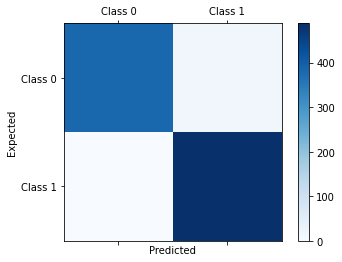

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=Y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

Confusion matrix:
 [[ 944    1]
 [   0 1129]]


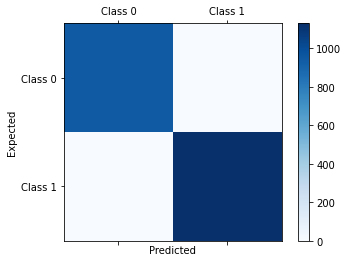

In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=Y_train, y_pred=Y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [ ]:
model_7.save('models/saved_model_1.h5')

#Explaining the Model
##Explainer initialization to communicate the useful information

In [ ]:
!pip install dalex

In [ ]:
import dalex as dx
dx.__version__

'1.1.0'

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, 
                                                   test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)

# Scale the train set
X_train = scaler.transform(X_train)

# Scale the test set
X_test = scaler.transform(X_test)

In [ ]:
import dalex as dx
import plotly.io as pio
from keras.models import load_model
import pandas as pd

#Converting numpy columns to pandas dataframe to match input data format for DALEX library

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=['birth_weight_kg', 'blood_culture_positive', 'central_venous_line',
 'comorbidity_cardiac', 'comorbidity_chronic_lung_disease',
 'comorbidity_ivh_or_shunt', 'comorbidity_necrotizing_enterocolitis',
 'comorbidity_surgical', 'ecmo', 'episode_id',
 'gestational_age_at_birth_weeks', 'inotrope_at_time_of_sepsis_eval',
 'inotrope_free_days', 'intubated_at_time_of_sepsis_evaluation',
 'intubated_free_days', 'length_of_stay_hours', 'onset_age_in_days',
 'onset_hour_of_day', 'period', 'positive_days', 'race', 'sepsis_group', 'sex',
 'stat_abx', 'temp_celsius', 'time_to_antibiotics', 'umbilical_arterial_line',
 'unique_patient_id'])

In [ ]:
X_train_df.head(1)

,birth_weight_kg,blood_culture_positive,central_venous_line,comorbidity_cardiac,comorbidity_chronic_lung_disease,comorbidity_ivh_or_shunt,comorbidity_necrotizing_enterocolitis,comorbidity_surgical,ecmo,episode_id,gestational_age_at_birth_weeks,inotrope_at_time_of_sepsis_eval,inotrope_free_days,intubated_at_time_of_sepsis_evaluation,intubated_free_days,length_of_stay_hours,onset_age_in_days,onset_hour_of_day,period,positive_days,race,sepsis_group,sex,stat_abx,temp_celsius,time_to_antibiotics,umbilical_arterial_line,unique_patient_id
0,-1.165219,-1.15317,0.971954,0.949387,-1.625722,-1.253836,-0.351385,0.44596,1.959486,-0.381407,-0.283949,0.010835,0.435312,0.483012,-1.46577,-0.549302,0.542641,0.582786,-0.49321,-0.23055,0.742848,1.331747,2.266954,1.583762,-0.583269,-0.709221,2.606999,-1.197356


#Converting the target data into dataframe

In [ ]:
Y_train_df = pd.DataFrame(Y_train,columns=['y'])

#Create explainer object

In [ ]:
explainer = dx.Explainer(model_7, X_train_df, Y_train_df, label='Mortality')

Preparation of a new explainer is initiated

  -> data              : 2074 rows 28 cols
  -> target variable   : Parameter 'y' was a pandas.DataFrame. Converted to a numpy.ndarray.
  -> target variable   : 2074 values
  -> model_class       : tensorflow.python.keras.engine.sequential.Sequential (default)
  -> label             : Mortality
  -> predict function  : <function yhat_tf_regression at 0x7f24096025f0> will be used (default)
  -> predict function  : Accepts pandas.DataFrame and numpy.ndarray.
  -> predicted values  : min = 0.0, mean = 0.543, max = 1.0
  -> model type        : regression will be used (default)
  -> residual function : difference between y and yhat (default)
  -> residuals         : min = -1.0, mean = -0.0047, max = 0.101
  -> model_info        : package tensorflow

A new explainer has been created!


#Model Level Explainations

#Assessing the model fit to training data

#How the model performs using different loss functions? Higher the loss - lower the performance

In [ ]:
explainer.model_performance()

,mse,rmse,r2,mae,mad
Mortality,0.003912,0.062546,0.984258,0.005352,0.000002


#Which features are the most important?

In [ ]:
explainer.model_parts().plot()

#What are the continuous relationships between variables and predictions?

#What are the continuous relationships between variables and predictions?

In [ ]:
explainer.model_profile().plot(variables=['sepsis_group', 'intubated_free_days', 'intubated_at_time_of_sepsis_evaluation', 
                                          'onset_age_in_days'])

Calculating ceteris paribus: 100%|██████████| 28/28 [00:21<00:00,  1.29it/s]


#what are the continuous relationships between diseases and predictions?

In [ ]:
explainer.model_profile().plot(variables=['comorbidity_necrotizing_enterocolitis', 'comorbidity_chronic_lung_disease',
                                          'comorbidity_cardiac', 'comorbidity_surgical', 'comorbidity_ivh_or_shunt'])

Calculating ceteris paribus: 100%|██████████| 28/28 [00:21<00:00,  1.28it/s]


#What about residuals?

In [ ]:
!pip install statsmodels --upgrade

Requirement already up-to-date: statsmodels in /usr/local/lib/python3.7/dist-packages (0.12.2)


In [ ]:
explainer.model_diagnostics().plot(variable='sepsis_group', yvariable="abs_residuals", marker_size=5, line_width=3)

In [ ]:
explainer.model_diagnostics().result

,birth_weight_kg,blood_culture_positive,central_venous_line,comorbidity_cardiac,comorbidity_chronic_lung_disease,comorbidity_ivh_or_shunt,comorbidity_necrotizing_enterocolitis,comorbidity_surgical,ecmo,episode_id,gestational_age_at_birth_weeks,inotrope_at_time_of_sepsis_eval,inotrope_free_days,intubated_at_time_of_sepsis_evaluation,intubated_free_days,length_of_stay_hours,onset_age_in_days,onset_hour_of_day,period,positive_days,race,sepsis_group,sex,stat_abx,temp_celsius,time_to_antibiotics,umbilical_arterial_line,unique_patient_id,y,y_hat,residuals,abs_residuals,label,ids
0,-1.165219,-1.153170,0.971954,0.949387,-1.625722,-1.253836,-0.351385,0.445960,1.959486,-0.381407,-0.283949,0.010835,0.435312,0.483012,-1.465770,-0.549302,0.542641,0.582786,-0.493210,-0.230550,0.742848,1.331747,2.266954,1.583762,-0.583269,-0.709221,2.606999,-1.197356,0,3.260600e-08,-3.260600e-08,3.260600e-08,Mortality,1
1,-1.620166,-1.683438,-0.781095,-0.026275,-1.477049,-1.217444,-0.887579,-0.838870,0.300880,2.527583,5.660505,4.930658,-0.236088,0.483012,-1.361907,-0.549302,-3.287633,0.582786,2.417418,-0.230550,0.058373,-0.827327,-0.518201,-0.700169,-0.583269,-0.709221,1.949094,-1.197356,1,9.999996e-01,3.576279e-07,3.576279e-07,Mortality,2
2,0.633187,0.618879,0.971954,-1.423330,1.473916,1.924529,-0.351385,-0.874297,-0.696693,-0.381407,-0.283949,0.697307,0.435312,0.483012,-1.465770,2.357974,0.378050,0.582786,2.417418,5.080148,-0.524768,-0.256783,-0.518201,-0.700169,-0.583269,1.672777,-0.453970,0.870285,0,7.327825e-18,-7.327825e-18,7.327825e-18,Mortality,3
3,-1.366646,-1.412222,-1.223078,0.325954,1.021987,0.667049,-0.335396,-0.913507,-0.820369,-0.381407,-0.283949,-0.057488,0.382205,0.483012,1.042096,-0.549302,0.372454,0.582786,2.367934,-0.230550,-0.517584,-0.927668,-0.518201,-0.661340,-0.583269,-0.709221,-0.453970,-1.197356,1,9.903243e-01,9.675682e-03,9.675682e-03,Mortality,4
4,-0.561647,-0.529192,0.971954,-0.928509,-0.041111,0.186523,-0.351385,-0.916886,0.361522,-0.381407,-0.283949,2.309360,0.435312,-0.076957,0.934353,-0.549302,0.542641,-1.908737,-0.493210,-0.230550,-1.445926,-0.905486,-0.518201,-0.700169,-0.583269,1.176020,-0.453970,-0.981757,1,9.999138e-01,8.618832e-05,8.618832e-05,Mortality,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2069,0.216807,0.169473,-1.261041,0.356208,1.060631,1.074266,-0.351385,-0.902689,-0.032649,-0.381407,-0.283949,-0.838223,0.435312,-2.202093,1.240317,-0.549302,0.542641,-1.908737,-0.493210,-0.230550,-0.524768,-0.901663,-0.518201,-0.700169,-0.583269,-0.709221,-0.453970,-0.163536,0,9.232012e-06,-9.232012e-06,9.232012e-06,Mortality,2070
2070,-0.516730,-0.458965,0.971954,0.356208,-0.179224,0.011436,-0.351385,-0.505193,1.129430,-0.381407,-0.283949,-0.368531,0.435312,-2.202093,1.240317,-0.549302,0.542641,0.582786,-0.493210,-0.230550,0.461156,-0.269911,-0.518201,-0.700169,-0.583269,1.672777,-0.453970,-0.163536,0,1.064403e-07,-1.064403e-07,1.064403e-07,Mortality,2071
2071,0.765212,0.741116,0.971954,-0.847568,1.072766,1.137656,-0.351385,-0.857387,0.567935,-0.381407,-0.283949,-0.628348,0.435312,0.483012,0.819626,1.887655,-0.147182,0.582786,2.417418,-0.230550,-0.593123,-0.886856,-0.518201,-0.700169,-0.583269,-0.709221,-0.453970,0.870285,1,9.999963e-01,3.695488e-06,3.695488e-06,Mortality,2072
2072,-1.482376,-1.533156,-1.261041,0.949387,1.473916,1.904284,-1.291857,-0.235463,1.129430,3.324000,0.978037,-1.000808,-2.688441,-2.202093,1.240317,-0.549302,0.542641,0.582786,-0.493210,-0.230550,1.447079,-0.295770,-0.518201,-0.700169,-0.583269,-0.709221,-0.453970,-1.197356,0,8.458681e-22,-8.458681e-22,8.458681e-22,Mortality,2073


#Calculation of partial dependence PD profiles to summarize the effect of a particular explanatory variable on the outcome or dependent variable.

In [ ]:
pd_rf = explainer.model_profile()
pd_rf.result

Calculating ceteris paribus: 100%|██████████| 28/28 [00:22<00:00,  1.26it/s]


,_vname_,_label_,_x_,_yhat_,_ids_
0,birth_weight_kg,Mortality,-1.631210,0.569987,0
1,birth_weight_kg,Mortality,-1.596748,0.569605,0
2,birth_weight_kg,Mortality,-1.562286,0.569231,0
3,birth_weight_kg,Mortality,-1.527824,0.568862,0
4,birth_weight_kg,Mortality,-1.493361,0.568507,0
...,...,...,...,...,...
2823,unique_patient_id,Mortality,1.780047,0.557823,0
2824,unique_patient_id,Mortality,1.811062,0.557707,0
2825,unique_patient_id,Mortality,1.842077,0.557584,0
2826,unique_patient_id,Mortality,1.873091,0.557456,0


#model_performance
#classification: F1, accuracy, recall, precision and AUC

In [ ]:
mp = explainer.model_performance(model_type = 'classification')
mp.result

,recall,precision,f1,accuracy,auc
Mortality,1.0,0.991127,0.995544,0.995178,0.999538


In [ ]:
mp.result.auc[0]

0.9995378724733832

In [ ]:
mp.plot()

#model_parts -- this function calculates variable importance

In [ ]:
vi = explainer.model_parts()
vi.result

,variable,dropout_loss,label
0,_full_model_,0.059327,Mortality
1,unique_patient_id,0.061752,Mortality
2,birth_weight_kg,0.070214,Mortality
3,period,0.070287,Mortality
4,blood_culture_positive,0.077633,Mortality
5,comorbidity_ivh_or_shunt,0.078205,Mortality
6,inotrope_at_time_of_sepsis_eval,0.080486,Mortality
7,comorbidity_necrotizing_enterocolitis,0.088712,Mortality
8,gestational_age_at_birth_weeks,0.093480,Mortality
9,central_venous_line,0.096297,Mortality


In [ ]:
vi.plot(max_vars=5)

#model_profile
#This function calculates explanations that explore model response as a function of selected variables.

#The explanations can be calulated as Partial Dependence Profile or Accumulated Local Dependence Profile.

In [ ]:
pdp_num = explainer.model_profile(type = 'partial', label="pdp")

Calculating ceteris paribus: 100%|██████████| 28/28 [00:22<00:00,  1.25it/s]


In [ ]:
ale_num = explainer.model_profile(type = 'accumulated', label="ale")

Calculating accumulated dependency: 100%|██████████| 28/28 [00:04<00:00,  5.68it/s]


In [ ]:
pdp_num.plot(ale_num)

#Predict-Level Explainations

In [ ]:
infant_1 = pd.DataFrame({'birth_weight_kg':[0.40], 'blood_culture_positive':[1], 'central_venous_line':[1],
 'comorbidity_cardiac':[0], 'comorbidity_chronic_lung_disease':[0],
 'comorbidity_ivh_or_shunt':[1], 'comorbidity_necrotizing_enterocolitis':[0],
 'comorbidity_surgical':[0], 'ecmo':[0], 'episode_id':[1],
 'gestational_age_at_birth_weeks':[23], 'inotrope_at_time_of_sepsis_eval':[0],
 'inotrope_free_days':[0], 'intubated_at_time_of_sepsis_evaluation':[1],
 'intubated_free_days':[0], 'length_of_stay_hours':[216.0], 'onset_age_in_days':[7],
 'onset_hour_of_day':[9], 'period':[0], 'positive_days':[6], 'race':[3], 'sepsis_group':[1], 'sex':[0],
 'stat_abx':[1], 'temp_celsius':[37.6], 'time_to_antibiotics':[393], 'umbilical_arterial_line':[1],
 'unique_patient_id':[1]})

In [ ]:
explainer.predict(X)[0:10]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
explainer.predict(infant_1)

array([0.], dtype=float32)

#Investigating the conditions of a particular infant

In [ ]:
explainer.predict_parts(X_train_df.loc[0], type='shap').plot()

In [ ]:
explainer.predict_parts(X_train_df.loc[1], type='shap').plot()

In [ ]:
!pip install lime

     |████████████████████████████████| 276kB 5.3MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-cp37-none-any.whl size=283846 sha256=0e57b289680db9655f0bff3b4b6f84b13136b45d5a11393034b5326adc962768
  Stored in directory: /root/.cache/pip/wheels/4c/4f/a5/0bc765457bd41378bf3ce8d17d7495369d6e7ca3b712c60c89
Successfully built lime


In [ ]:
lime_explanation = explainer.predict_surrogate(X_train_df.loc[0], mode='regression')

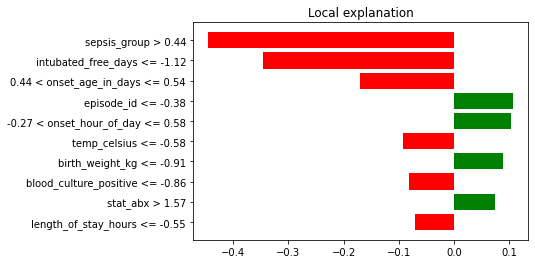

In [ ]:
lime_explanation.plot()

In [ ]:
lime_explanation.result

,variable,effect
0,sepsis_group > 0.44,-0.444874
1,intubated_free_days <= -1.12,-0.345039
2,0.44 < onset_age_in_days <= 0.54,-0.171006
3,episode_id <= -0.38,0.106281
4,-0.27 < onset_hour_of_day <= 0.58,0.104003
5,temp_celsius <= -0.58,-0.092689
6,birth_weight_kg <= -0.91,0.089024
7,blood_culture_positive <= -0.86,-0.081457
8,stat_abx > 1.57,0.073437
9,length_of_stay_hours <= -0.55,-0.070824


#Interpretable surrogate model

#Surrogate model is used to explain the feature importance and there other models are also used as a proxy to explain the feature importance. A decision tree plot below can be helpful in understanding the dataset and feature importance

In [ ]:
surrogate_model = explainer.model_surrogate(max_vars=6, max_depth=3)
surrogate_model.performance

,mse,rmse,r2,mae,mad
DecisionTreeRegressor,0.072572,0.269392,0.705814,0.14658,0.05374


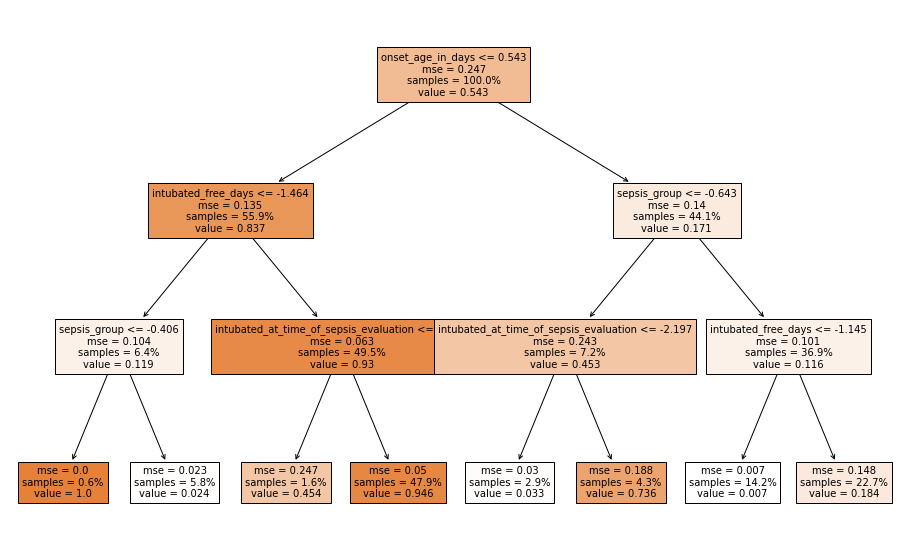

In [ ]:
surrogate_model.plot()